# Unet Test


In [1]:
%pip install einops timm imutils torchvision lightning torchmetrics keras

You should consider upgrading via the '/Users/haily/.pyenv/versions/3.10.4/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import torch
os.environ["KERAS_BACKEND"] = "torch"

try:
    from utils import get_seg_lightning_modules, get_segmentation_plot, local_paths, kaggle_paths
    from unet import build_model
except Exception as e:
    import sys
    sys.path.append("/kaggle/input/segmentation-util")
    from utils import get_seg_lightning_modules, get_segmentation_plot, local_paths, kaggle_paths
    from unet import build_model

from lightning.pytorch.callbacks import EarlyStopping

/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
FAST = False # Fast dev: run 1 batch only
LOCAL = True
ACCELERATOR = 'mps'
DEVICE = 'auto'

dataset_paths = local_paths if LOCAL else kaggle_paths

## Shenzhen


In [3]:
s_dm, s_module, s_trainer = get_seg_lightning_modules(
    data_paths=dataset_paths['shenzen'],
    model_name='shenzen_unet',
    model=build_model(),
    fast=FAST,
    accelerator=ACCELERATOR,
    devices=DEVICE, 
    learning_rate=5*1e-4,
    max_epochs=50,
    callbacks=[EarlyStopping('val_ce_loss', patience=5)],
    ckpt='./logs/unet_50/shenzen/version_0/checkpoints/epoch=25-step=4134.ckpt'
)
s_trainer.test(s_module, s_dm)

/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.3.3, which is newer than your current Lightning version: v2.3.0
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


142 examples in the test set...
Testing DataLoader 0:   0%|          | 0/71 [00:00<?, ?it/s]

/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/keras/src/backend/common/backend_utils.py:91: UserWarning: You might experience inconsistencies across backends when calling conv transpose with kernel_size=3, stride=2, dilation_rate=1, padding=same, output_padding=1.
  warnings.warn(


Testing DataLoader 0: 100%|██████████| 71/71 [00:15<00:00,  4.50it/s]
f1: 0.9847981090277014
accuracy: 0.977308622548278
precision: 0.9827607710596541
recall: 0.9869762625492794
mean_iou: 0.9655105488401063
dice: 0.977308622548278


[{}]

142 examples in the test set...


/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/keras/src/backend/common/backend_utils.py:91: UserWarning: You might experience inconsistencies across backends when calling conv transpose with kernel_size=3, stride=2, dilation_rate=1, padding=same, output_padding=1.
  warnings.warn(


[<Figure size 1500x1000 with 4 Axes>,
 <Figure size 1500x1000 with 4 Axes>,
 <Figure size 1500x1000 with 4 Axes>]

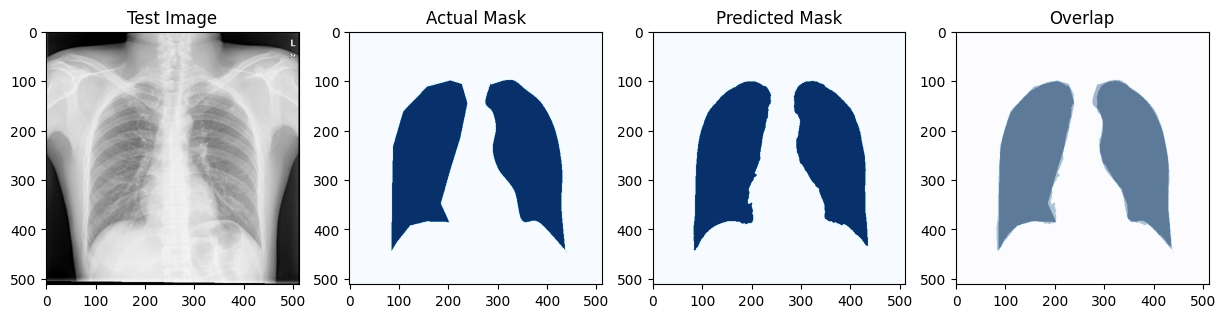

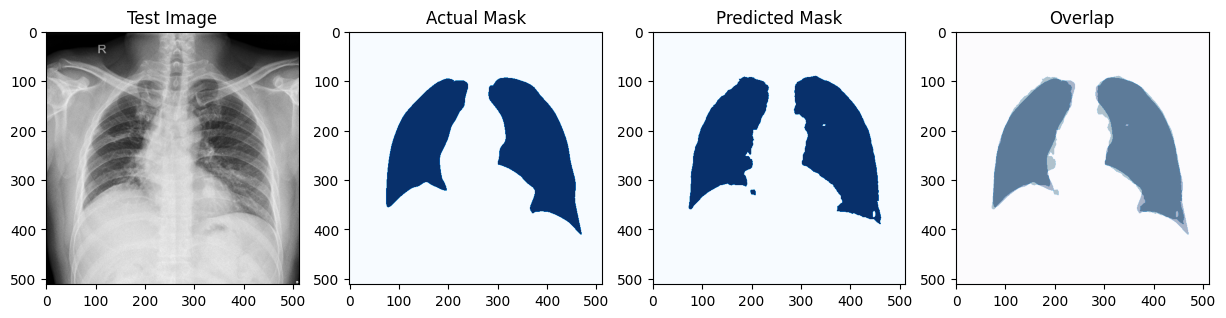

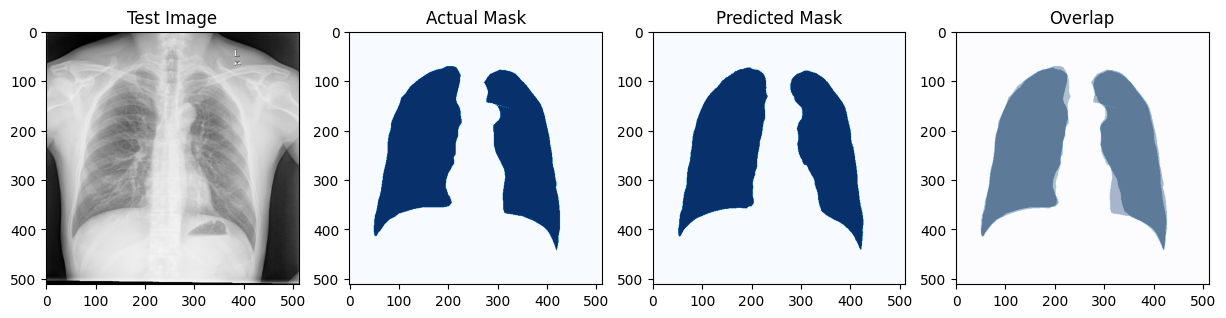

In [4]:
s_dm.setup('test')
get_segmentation_plot(
    s_module.model, 
    s_dm.test, 
    device='mps')

## Darwin


In [5]:
d_dm, d_module, d_trainer = get_seg_lightning_modules(
    data_paths=dataset_paths['darwin'],
    model_name='darwin_unet',
    model=build_model(),
    fast=FAST,
    accelerator=ACCELERATOR,
    devices=DEVICE,
    learning_rate=5*1e-4,
    max_epochs=50,
    callbacks=[EarlyStopping('val_ce_loss', patience=5)],
    ckpt='./logs/unet_50/darwin/version_0/checkpoints/epoch=30-step=53227.ckpt'
)
d_trainer.test(d_module, d_dm)

/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.3.3, which is newer than your current Lightning version: v2.3.0
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


1527 examples in the test set...
Testing DataLoader 0: 100%|██████████| 764/764 [02:41<00:00,  4.72it/s]
f1: 0.9769113870503391
accuracy: 0.969219824406489
precision: 0.9777942778864456
recall: 0.9762525055264928
mean_iou: 0.9502899548458179
dice: 0.969219824406489


[{}]

1527 examples in the test set...


[<Figure size 1500x1000 with 4 Axes>,
 <Figure size 1500x1000 with 4 Axes>,
 <Figure size 1500x1000 with 4 Axes>]

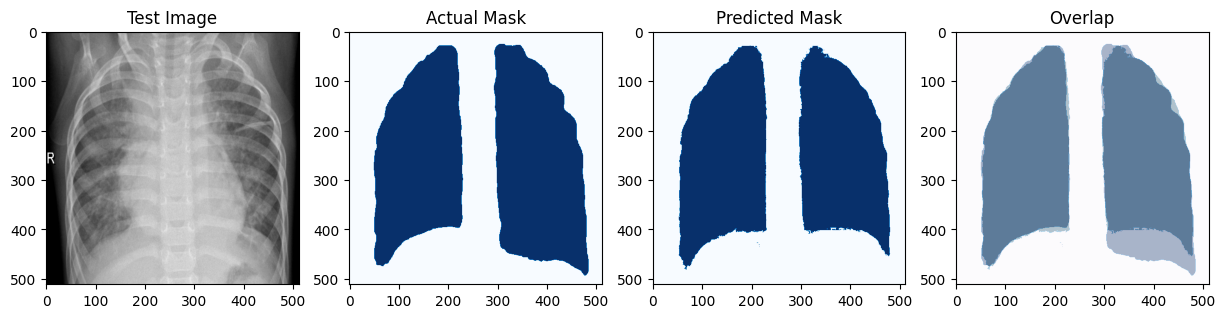

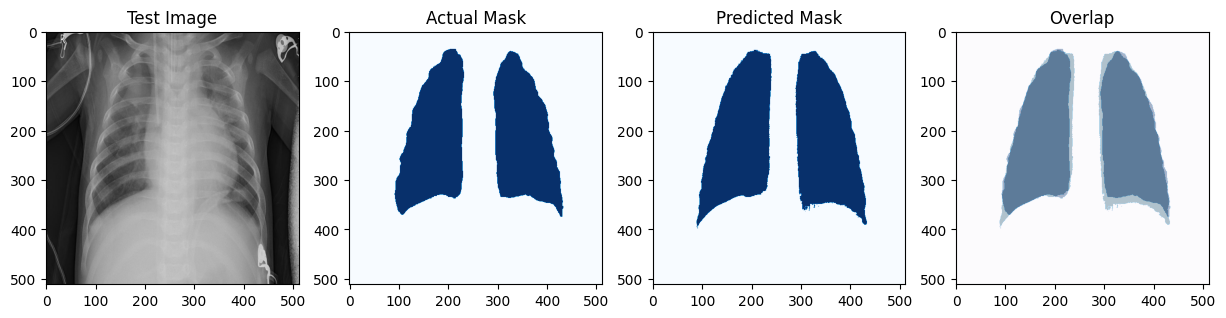

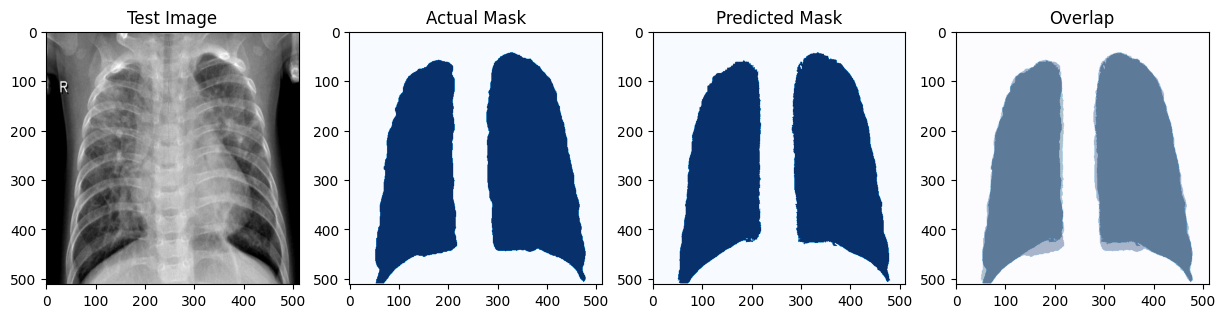

In [7]:
d_dm.setup('test')
get_segmentation_plot(
    d_module.model, 
    d_dm.test, 
    device='mps')

## Covid


In [6]:
c_dm, c_module, c_trainer = get_seg_lightning_modules(
    data_paths=dataset_paths['covid'],
    model_name='covid_unet',
    model=build_model(img_size=256),
    fast=FAST,
    accelerator=ACCELERATOR,
    devices=DEVICE,
    learning_rate=5*1e-4,
    max_epochs=50,
    callbacks=[EarlyStopping('val_ce_loss', patience=5)],
    ckpt='./logs/unet_50/covid/version_0/checkpoints/epoch=32-step=33561.ckpt'
)

/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.3.3, which is newer than your current Lightning version: v2.3.0
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [7]:
c_trainer.test(c_module, c_dm)

904 examples in the test set...
Testing DataLoader 0:   0%|          | 1/452 [00:00<02:02,  3.69it/s]

/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/keras/src/backend/common/backend_utils.py:91: UserWarning: You might experience inconsistencies across backends when calling conv transpose with kernel_size=3, stride=2, dilation_rate=1, padding=same, output_padding=1.
  warnings.warn(


Testing DataLoader 0: 100%|██████████| 452/452 [00:30<00:00, 14.91it/s]
f1: 0.9916021831795178
accuracy: 0.987534582087424
precision: 0.9933149266031991
recall: 0.9899380408820853
mean_iou: 0.9808695532579338
dice: 0.987534582087424


[{}]

904 examples in the test set...


/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/keras/src/backend/common/backend_utils.py:91: UserWarning: You might experience inconsistencies across backends when calling conv transpose with kernel_size=3, stride=2, dilation_rate=1, padding=same, output_padding=1.
  warnings.warn(


[<Figure size 1500x1000 with 4 Axes>,
 <Figure size 1500x1000 with 4 Axes>,
 <Figure size 1500x1000 with 4 Axes>]

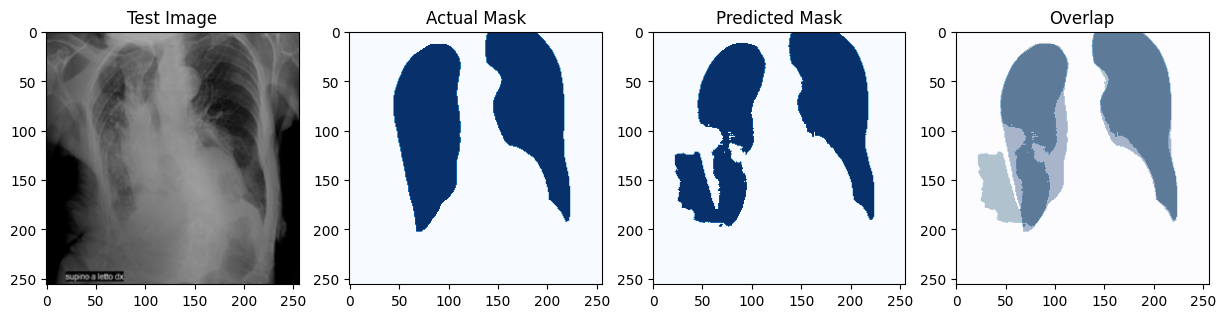

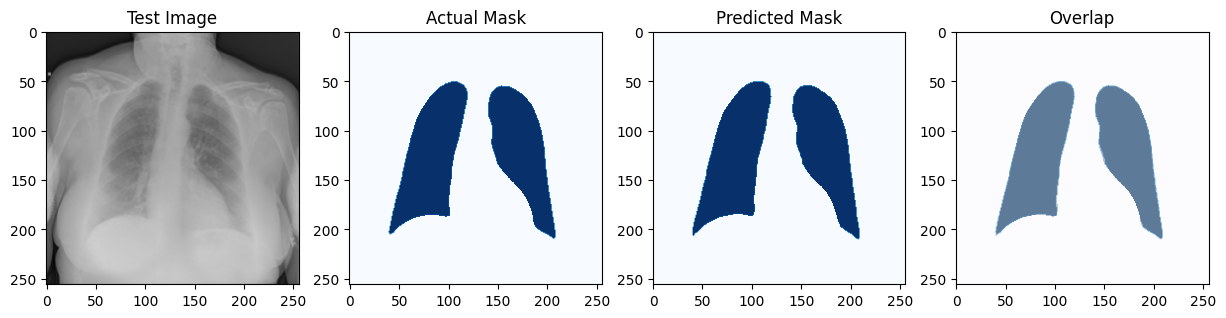

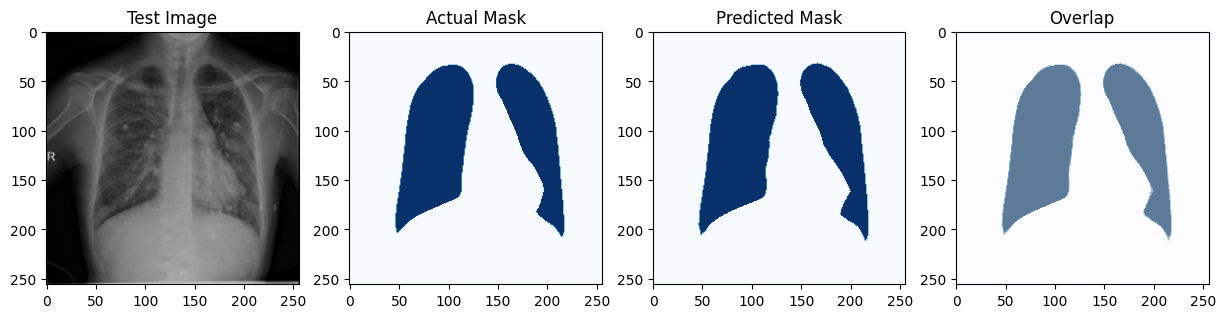

In [8]:
c_dm.setup('test')
get_segmentation_plot(
    c_module.model, 
    c_dm.test, 
    device='mps')